In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head(8)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#Deleted unecessary Columns
df.drop(['insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_state','incident_city','policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [7]:
#Removed missing or null values
df._c39 = df._c39.fillna('NA')
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year 

In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["fraud_reported"]=LE.fit_transform(df["fraud_reported"])
df["fraud_reported"].value_counts()


0    753
1    247
Name: fraud_reported, dtype: int64

In [9]:
LE.inverse_transform([1,0])

array(['Y', 'N'], dtype=object)

0    753
1    247
Name: fraud_reported, dtype: int64


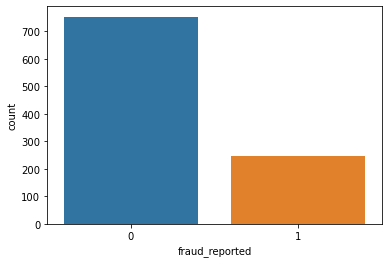

In [10]:
import seaborn as sns
ax=sns.countplot(x='fraud_reported',data=df)
print(df["fraud_reported"].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


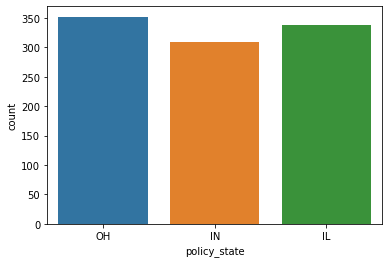

In [11]:
import seaborn as sns
ax=sns.countplot(x='policy_state',data=df)
print(df["policy_state"].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


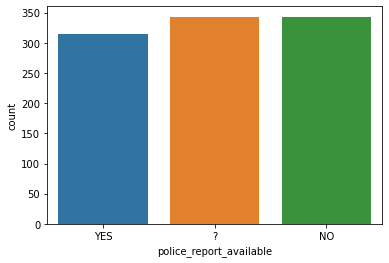

In [12]:
import seaborn as sns
ax=sns.countplot(x='police_report_available',data=df)
print(df["police_report_available"].value_counts())

In [13]:
df.drop([ 'authorities_contacted',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'witnesses', 'police_report_available'],axis=1,inplace=True)

In [14]:
df.shape

(1000, 27)

In [15]:
#Showing the correlation
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,-0.010162,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,-0.015679,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,-0.004558,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,-0.022765,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,0.026780,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,0.022743,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.028695,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,0.055829,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.024418,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
bodily_injuries,-0.010162,-0.015679,-0.004558,-0.022765,0.026780,0.022743,0.028695,0.055829,-0.024418,1.000000,0.047093,0.047319,0.039749,0.043449,-0.020527,0.033877


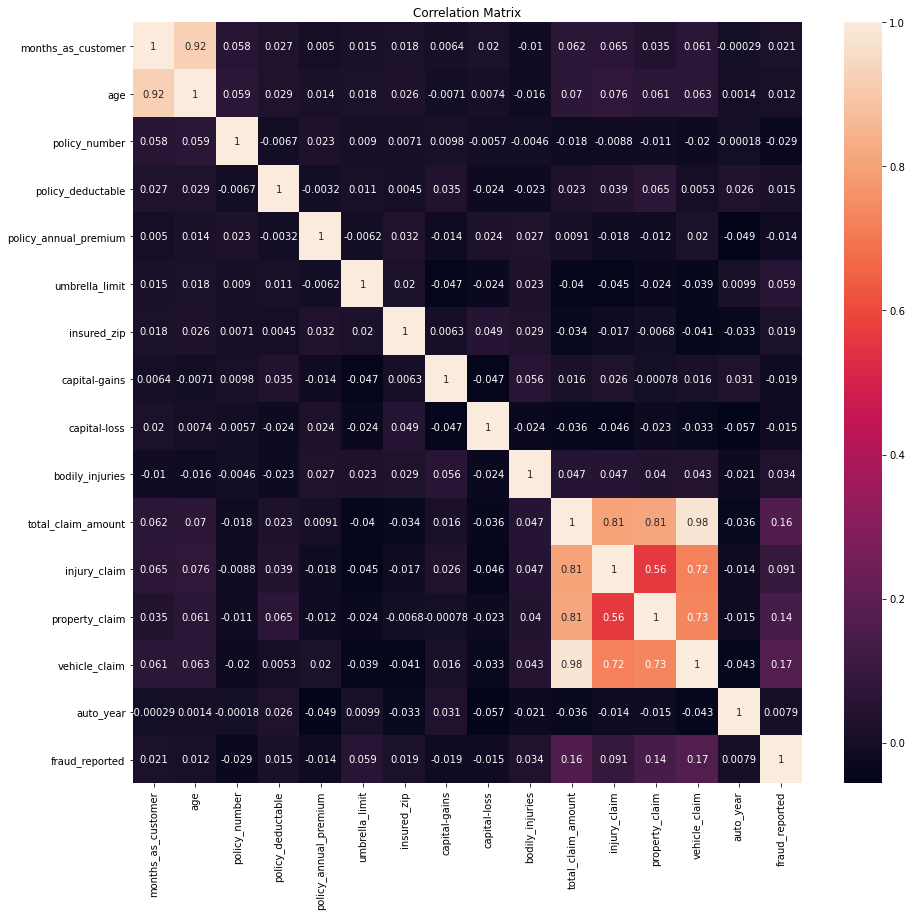

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df.corr()
plt.figure(figsize=(15,14))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
#Deleting closely related columns
df.drop(["total_claim_amount"],axis=1,inplace=True)

In [18]:
df.dtypes

months_as_customer         int64
age                        int64
policy_number              int64
policy_state              object
policy_csl                object
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int64
insured_zip                int64
insured_sex               object
capital-gains              int64
capital-loss               int64
incident_date             object
incident_type             object
collision_type            object
incident_severity         object
property_damage           object
bodily_injuries            int64
injury_claim               int64
property_claim             int64
vehicle_claim              int64
auto_make                 object
auto_model                object
auto_year                  int64
fraud_reported             int32
_c39                      object
dtype: object

In [19]:
#Skewness checked and removed where required
df.skew().sort_values

<bound method Series.sort_values of months_as_customer       0.362177
age                      0.478988
policy_number            0.038991
policy_deductable        0.477887
policy_annual_premium    0.004402
umbrella_limit           1.806712
insured_zip              0.816554
capital-gains            0.478850
capital-loss            -0.391472
bodily_injuries          0.014777
injury_claim             0.264811
property_claim           0.378169
vehicle_claim           -0.621098
auto_year               -0.048289
fraud_reported           1.175051
dtype: float64>

In [20]:
df["umbrella_limit"] = df["umbrella_limit"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['umbrella_limit'].skew())

1.4960613107610279


In [21]:
df["vehicle_claim"] = df["vehicle_claim"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['vehicle_claim'].skew())

-1.6717339559561781


In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [24]:
x=df.drop(columns=["fraud_reported"],axis=1)
y=df["fraud_reported"]

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [26]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," Model peforms well")
        print("At random state",i)
        print("Training r_2 score is:",accuracy_score(y_train,pred_train))
        print("Testing r_2 score is:",accuracy_score(y_test,pred_test))
    

At random state 29  Model peforms well
At random state 29
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333
At random state 54  Model peforms well
At random state 54
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333
At random state 55  Model peforms well
At random state 55
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333
At random state 61  Model peforms well
At random state 61
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333
At random state 81  Model peforms well
At random state 81
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333
At random state 92  Model peforms well
At random state 92
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333
At random state 96  Model peforms well
At random state 96
Training r_2 score is: 0.7528571428571429
Testing r_2 score is: 0.7533333333333333


In [28]:
#Printing the classification report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=98)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       233
           1       0.00      0.00      0.00        67

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.60      0.78      0.68       300



In [34]:
#Cross Validation
from sklearn.model_selection import cross_val_score
pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:",j)
    print("Cross validation score is:",lsc*100)
    print("Accuracy score is:",lss*100)
    print("\n")

At cv: 2
Cross validation score is: 75.4
Accuracy score is: 77.66666666666666


At cv: 3
Cross validation score is: 75.20005034975095
Accuracy score is: 77.66666666666666


At cv: 4
Cross validation score is: 75.30000000000001
Accuracy score is: 77.66666666666666


At cv: 5
Cross validation score is: 75.2
Accuracy score is: 77.66666666666666


At cv: 6
Cross validation score is: 75.30000240482889
Accuracy score is: 77.66666666666666


At cv: 7
Cross validation score is: 75.30005206061541
Accuracy score is: 77.66666666666666


At cv: 8
Cross validation score is: 75.3
Accuracy score is: 77.66666666666666


At cv: 9
Cross validation score is: 75.2002002002002
Accuracy score is: 77.66666666666666




In [35]:
lsscore_selected=cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is:",lsscore_selected,"\n The accuracy_score is:",lss)

The cv score is: 0.7530000000000001 
 The accuracy_score is: 0.7766666666666666
